# EXPLORATORY DATA ANALYSIS OF THE DATASET - AMAZON BEST SELLING BOOK OF THE DECADE 2009-2019

Amazon.com is one of the best online shopping site to buy books. in this notebook, lets do a Exploratory Data Analyis to review the top selling book from 2009 to 2019 and analyse the relations ship between the reviews, prices etc which helps the people to buy.

In [1]:
#Importing the important libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


Reading the dataset

In [2]:
best_b = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
best_b.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


Reviewing the fields and type of data

In [3]:
len(best_b)

550

In [4]:
best_b.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

There are 550 rows contains the best selling book details. There are 7 columns

Name - Name of the book
Author - Author name of the book
User Rating - Rating provided by the users ranging from 0 to 5
Reviews - no of reviews recevied for the books. inspite of postivie or negative reviews.
Year - Year in which the book is published
Genere - Gener of the book whether it is Fiction or Non-Fictions


In [5]:
best_b.info

<bound method DataFrame.info of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson  

In [6]:
best_b.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
best_b.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Glaring Issues
Duplicates¶

It's very common for bestselling books to get reissued/republished. It is necessary to filter out this kind of noise by either eliminating or merging.

In [8]:
best_b.duplicated('Name')
dup_df = best_b.drop_duplicates(subset = 'Name', keep = 'last', inplace = False)
dup_df.shape

(351, 7)

In [9]:
dup_df.duplicated('Name').sum()

0

Let's explore the data by examining the authors. How many authors got into the list? How many books did they write? How many reviews did they get?

In [10]:
dup_df.nunique()

Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64

There are 248 authors in this list, and they dished out 351 best selling books between 2009 and 2019. 

In [11]:
genre = best_b['Genre'].value_counts()/len(best_b)*100
genre

Non Fiction    56.363636
Fiction        43.636364
Name: Genre, dtype: float64

****Pie plot to view the percentage of the different genre.

The pie chat below shows that over the decade a higher percentage of books in the  non-fiction genre were published  

The code above shows that there are two genres of books in this dataset. Fiction and Non-fiction

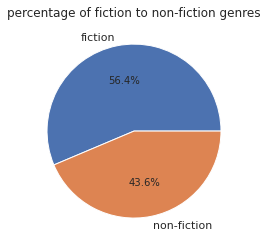

In [12]:
mylabels = ['fiction', 'non-fiction']
plt.title('percentage of fiction to non-fiction genres')
plt.pie(genre, autopct = '%1.1f%%', labels = mylabels)
plt.show()

****Bar plot showing the trends over the years 

In [13]:
genrecount = dup_df[['Year', 'Genre', 'Name']]
genrecount.head(10)

,Year,Genre,Name
0,2016,Non Fiction,10-Day Green Smoothie Cleanse
1,2011,Fiction,11/22/63: A Novel
2,2018,Non Fiction,12 Rules for Life: An Antidote to Chaos
3,2017,Fiction,1984 (Signet Classics)
4,2019,Non Fiction,"5,000 Awesome Facts (About Everything!) (Natio..."
5,2011,Fiction,A Dance with Dragons (A Song of Ice and Fire)
6,2014,Fiction,A Game of Thrones / A Clash of Kings / A Storm...
7,2017,Fiction,A Gentleman in Moscow: A Novel
8,2018,Non Fiction,"A Higher Loyalty: Truth, Lies, and Leadership"
10,2017,Fiction,A Man Called Ove: A Novel


Text(0, 0.5, 'Number of Books')

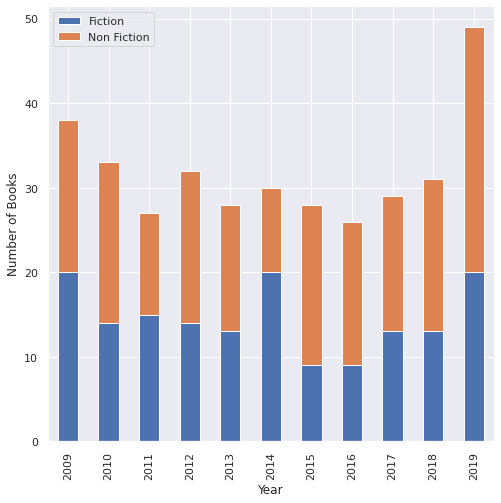

In [14]:
genreplot = genrecount.groupby(by = ['Year','Genre']).count()['Name']
ax = genreplot.unstack('Genre').plot.bar(stacked = True, figsize = (8, 8))
ax.legend(['Fiction', 'Non Fiction'], loc = 'best')
ax.set_ylabel('Number of Books')

The table above shows that both fiction and non fiction were quite popular amongst users except in year 2014 where fiction was remarkably higher than non-fiction.  

In [15]:
year_genre = pd.pivot_table(data = dup_df, 
                            columns = 'Year',
                            index = 'Genre', 
                            values = 'Price',
                            aggfunc=np.mean)
year_genre

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,,
Fiction,17.550000,9.571429,11.600000,13.857143,11.923077,11.5,11.000000,19.777778,9.384615,9.000000,9.350000
Non Fiction,13.555556,13.526316,17.416667,15.888889,11.733333,28.5,8.894737,13.352941,14.562500,12.777778,10.482759


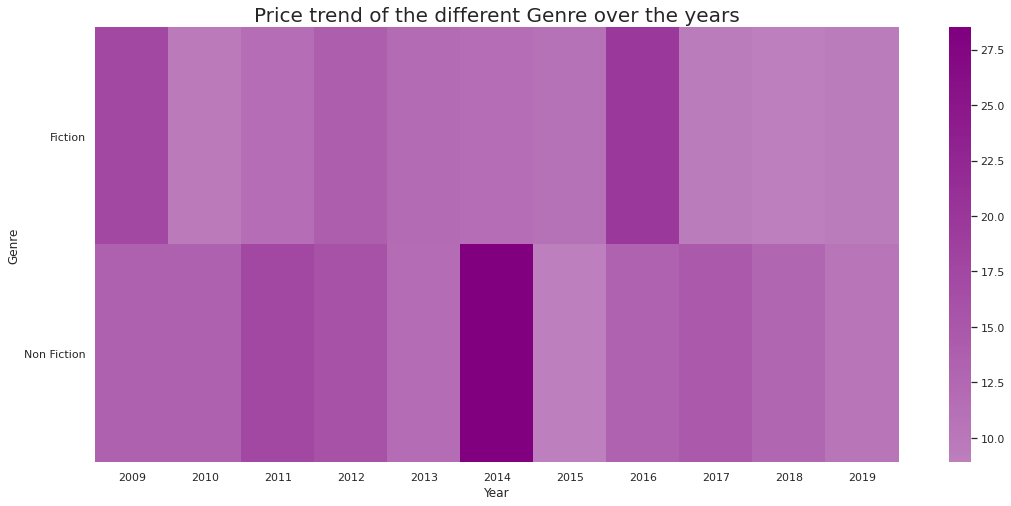

In [16]:
plt.figure(figsize=[18,8])
cmap = sns.light_palette('purple', as_cmap = True)
sns.heatmap(year_genre,cmap = cmap,center = 10)
plt.yticks(rotation = 0)
plt.title('Price trend of the different Genre over the years',fontsize = 20)
plt.show()

****Bar plot showing the top ten authors of the decade based on reveiws

In [17]:
AR = dup_df.groupby(['Author']).agg({"Reviews":"sum"}).sort_values(["Reviews"], ascending = False).reset_index()
AR

,Author,Reviews
0,E L James,130746
1,Suzanne Collins,130548
2,Delia Owens,87841
3,Paula Hawkins,79446
4,J.K. Rowling,70535
...,...,...
243,Larry Schweikart,460
244,Jon Stewart,440
245,Edward M. Kennedy,438
246,Peter A. Lillback,408


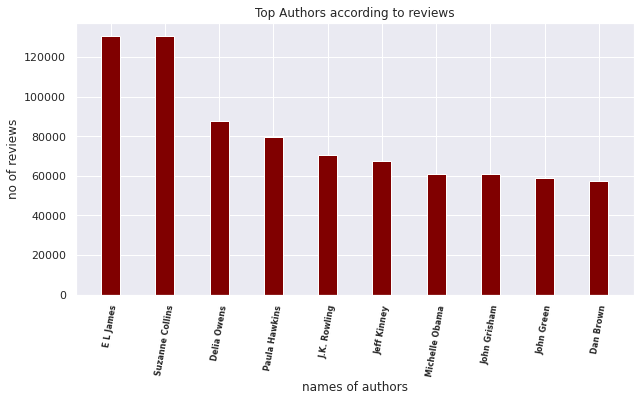

In [18]:
name = AR['Author'].head(10)
review = AR['Reviews'].head(10)
   
fig = plt.figure(figsize = (10, 5)) 
plt.bar(name, review, color ='maroon',width = 0.35)  
plt.xlabel("names of authors") 
plt.ylabel("no of reviews") 
plt.xticks(rotation = 80,weight = 'bold', size = 8)
plt.title("Top Authors according to reviews") 
plt.show() 

****Bar plot showing the best selling books of the decade

In [19]:
Bp = dup_df.groupby(['Name']).agg({"Price":"sum"}).sort_values(["Price"], ascending = False).reset_index()
Bp

,Name,Price
0,Diagnostic and Statistical Manual of Mental Di...,105
1,The Twilight Saga Collection,82
2,Hamilton: The Revolution,54
3,The Book of Basketball: The NBA According to T...,53
4,Harry Potter Paperback Box Set (Books 1-7),52
...,...,...
346,Little Blue Truck,0
347,The Short Second Life of Bree Tanner: An Eclip...,0
348,Frozen (Little Golden Book),0
349,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",0


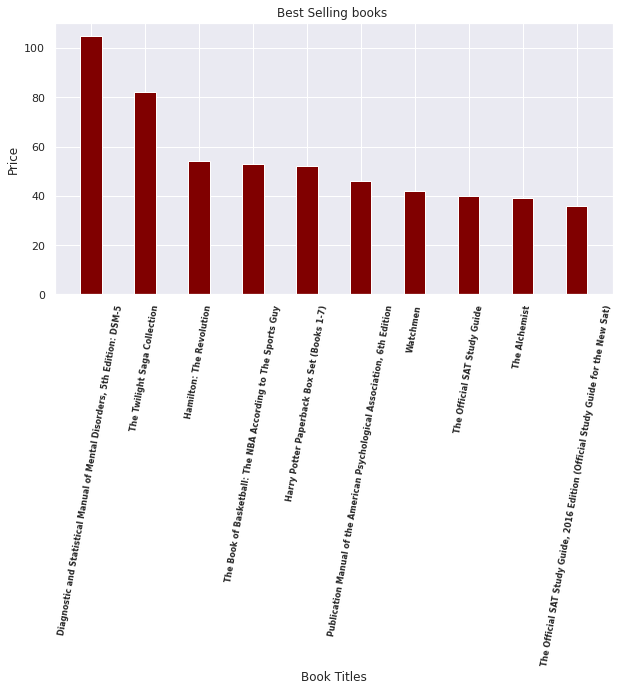

In [20]:
name = Bp ['Name'].head(10)
price = Bp ['Price'].head(10)
   
fig = plt.figure(figsize = (10, 5)) 
plt.bar(name, price, color ='maroon',width = 0.4) 
plt.xlabel("Book Titles") 
plt.ylabel("Price") 
plt.xticks(rotation = 80, weight ='bold', size=8)
plt.title("Best Selling books ") 
plt.show() 